# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [198]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

In [199]:
import warnings
warnings.filterwarnings('ignore')

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [334]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [335]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        return np.square(X.dot(w) - y).mean()
        
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        return 2 * np.dot(X.T, X.dot(w) - y) / y.shape[0]


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [336]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [337]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, n_iterations: int = 100000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]

    for _ in range(n_iterations):
        w = w - lr * loss.calc_grad(X, y, w)
        w_list.append(w.copy())
    
    w_list = np.array(w_list)
    
    return w_list

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [338]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features, ))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]  
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [339]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


In [340]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.figure(figsize=(15, 6))
    plt.title("GD trajectory")
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    #plt.xlim(w_list[:, 0].min() - 0.1, 
             #w_list[:, 0].max() + 0.1)
    #plt.ylim(w_list[:, 1].min() - 0.1,
             #w_list[:, 1].max() + 0.1)
    plt.xlim(-1, 1)
    plt.ylim(-2, 2)
    plt.gca().set_aspect('equal')

    # visualize the level set
    CS = plt.contour(A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

    plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

lr = 0.0001


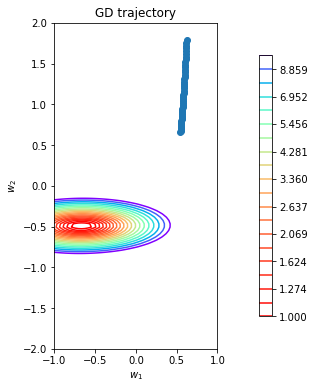

lr = 0.001


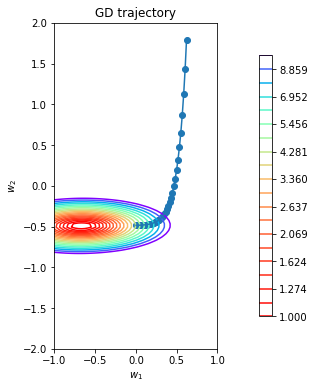

lr = 0.01


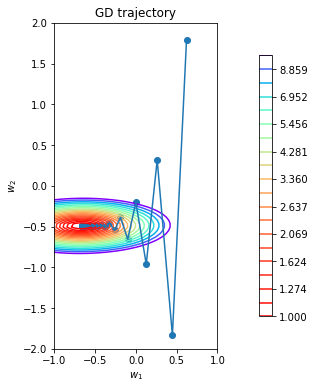

lr = 0.02


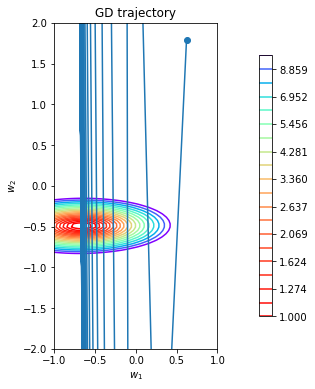

lr = 0.1


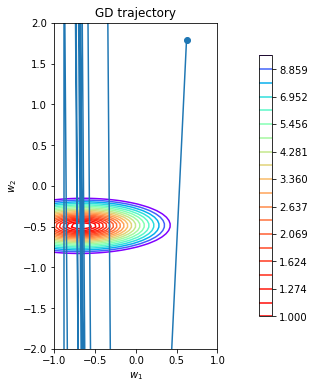

In [341]:
lr_list = [0.0001, 0.001, 0.01, 0.02, 0.1]
for lr in lr_list:
    wlist = gradient_descent(w_init, X, y, loss, lr, num_steps)
    print(f"lr = {lr}")
    plot_gd(wlist, X, y, loss)

При самом маленьком размере шага lr=0.0001 линий уровня градиентный спуск не достиг - вероятно, из-за недостаточного количества итераций. Увеличения шага до 0.001 достаточно для того, чтобы дойти до линий уровня, все еще недостаточно, чтобы дойти до точки минимума. Шаг, равный 0.01 является самым удачным среди выбранных мной вариантов: происходит быстрый спуск к линиям уровня зигзагообразными движениями, затем - схождение к минимуму. Дальнейшее увеличение шага приводит к расходимости метода.


Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [342]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]

    for _ in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        w -= lr * loss.calc_grad(batch, y[batch_indices], w)
        w_list.append(w.copy())
    
    w_list = np.array(w_list)
    
    return w_list
    

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

lr = 0.0001, batch_size = 1


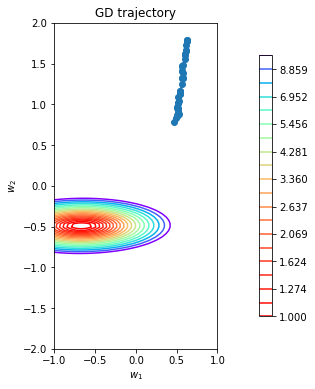

lr = 0.0001, batch_size = 10


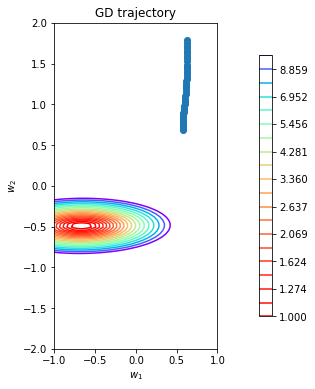

lr = 0.0001, batch_size = 50


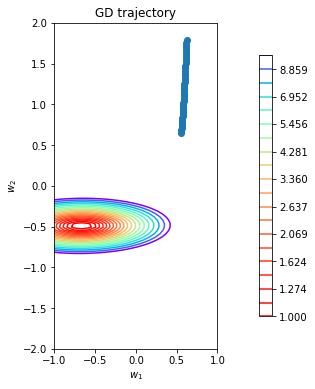

lr = 0.0001, batch_size = 100


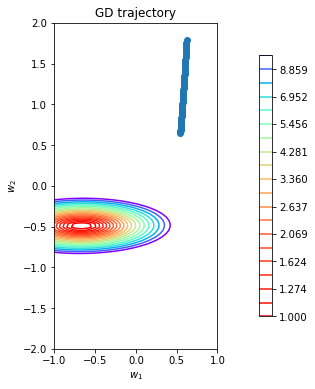

lr = 0.0001, batch_size = 150


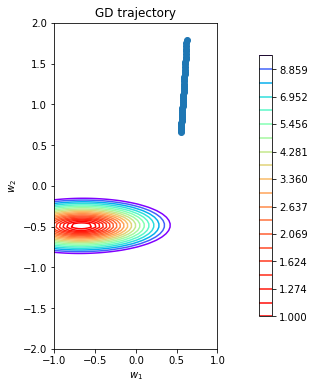

lr = 0.001, batch_size = 1


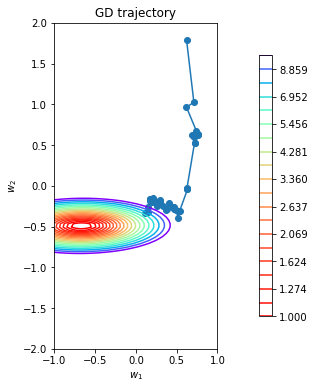

lr = 0.001, batch_size = 10


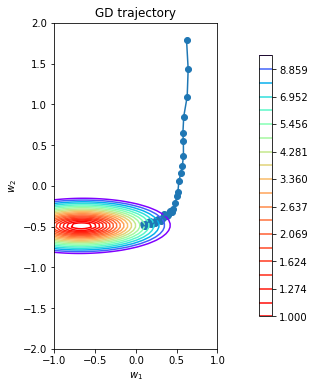

lr = 0.001, batch_size = 50


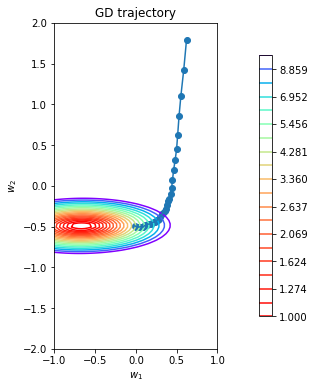

lr = 0.001, batch_size = 100


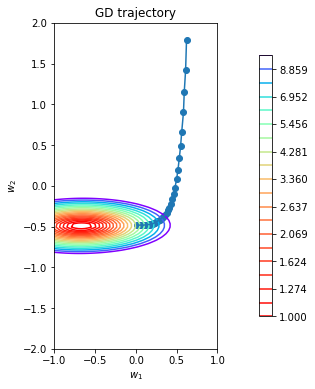

lr = 0.001, batch_size = 150


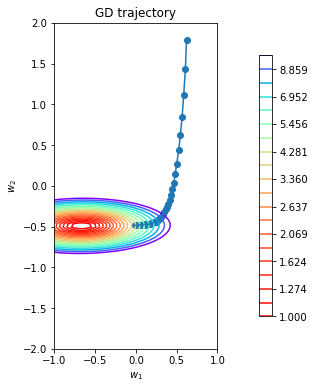

lr = 0.005, batch_size = 1


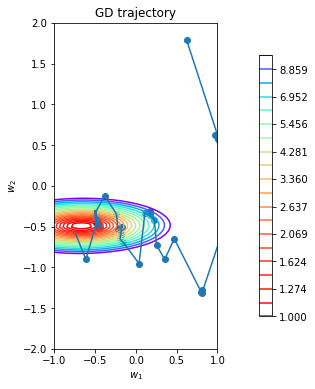

lr = 0.005, batch_size = 10


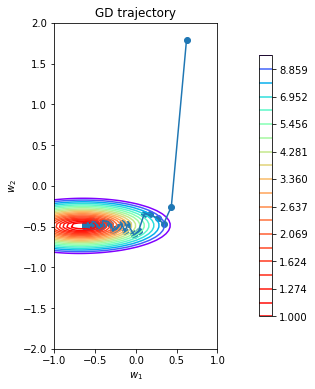

lr = 0.005, batch_size = 50


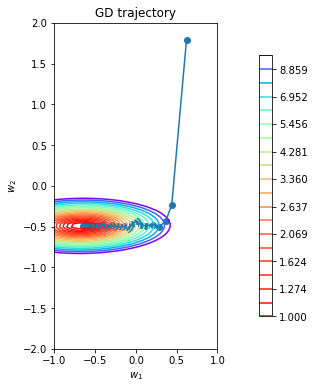

lr = 0.005, batch_size = 100


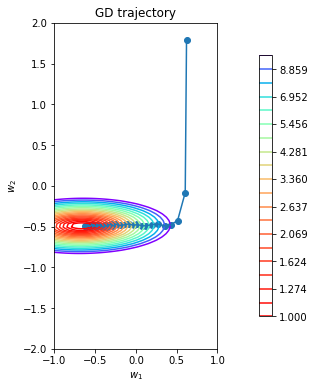

lr = 0.005, batch_size = 150


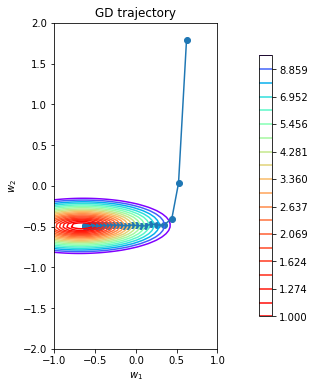

lr = 0.01, batch_size = 1


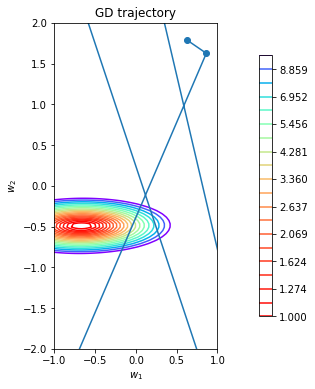

lr = 0.01, batch_size = 10


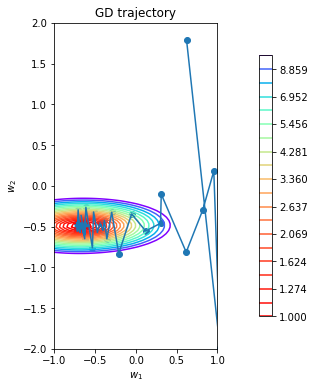

lr = 0.01, batch_size = 50


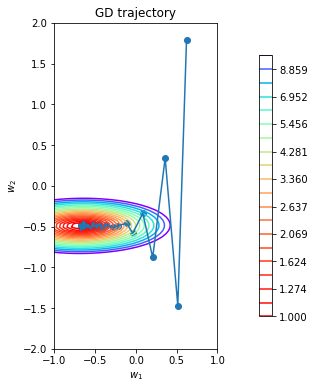

lr = 0.01, batch_size = 100


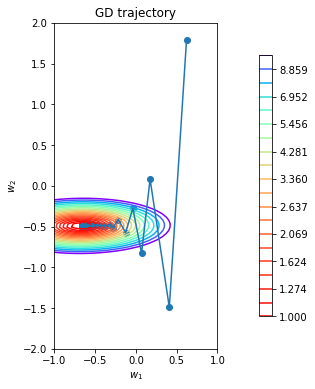

lr = 0.01, batch_size = 150


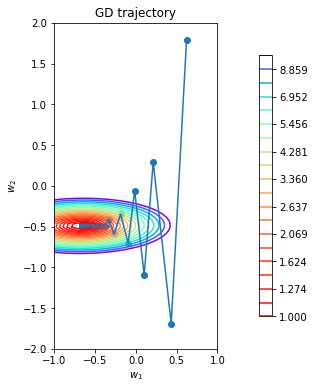

In [343]:
lr_list = [0.0001, 0.001, 0.005, 0.01]
batch_size_list = [1, 10, 50, 100, 150]
for lr in lr_list:
    for bs in batch_size_list:
        wlist = stochastic_gradient_descent(w_init, X, y, loss, lr, bs, num_steps)
        print(f'lr = {lr}, batch_size = {bs}')
        plot_gd(wlist, X, y, loss)

Заметно, что чем больше размер подвыборки, тем более стабильная траектория стохастического градиентного спуска (это особенно видно при lr = 0.005 и batch_size, например, 1 и 50), и чем меньше размер шага, тем менее хаотичной она становится даже на небольших подвыборках (при batch_size = 1 и lr = 0.001 траектория является ломаной, но между точками далеко не такой сильный разброс, как при lr = 0.005). 

В целом шаги градиентного спуска более шумные, чем у обычного градиентного спуска, но в итоге они тоже сходятся к оптимальному значению пр правильно подобранных гиперпараметрах.





Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [344]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_features,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    w = w_init.copy()
    w_list = [w.copy()]

    for t in range(n_iterations):
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batch = X[batch_indices]
        step = lr * (1 / (1 + t)) ** p
        w -= step * loss.calc_grad(batch, y[batch_indices], w)
        w_list.append(w.copy())
    
    w_list = np.array(w_list)
    
    return w_list

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

p = 0.1


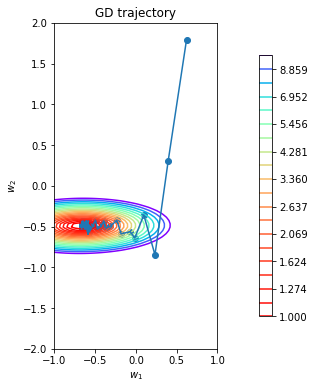

p = 0.3


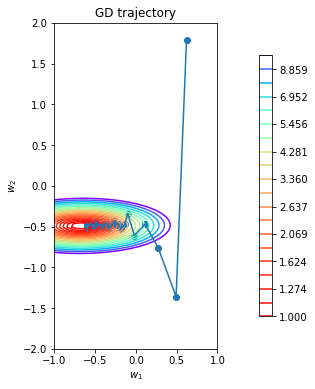

p = 0.5


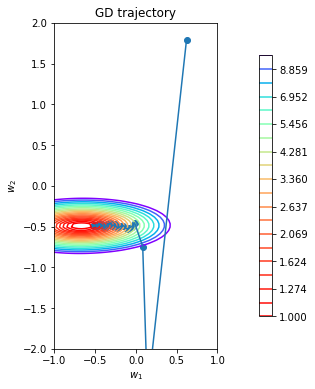

p = 0.7


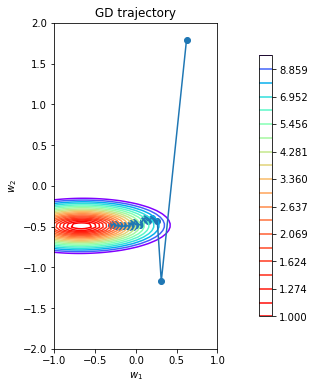

p = 0.9


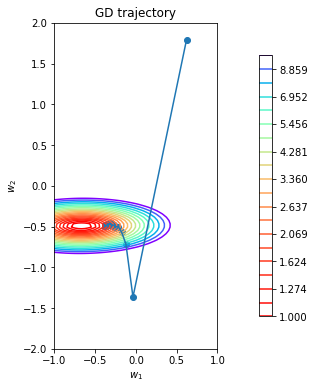

p = 1


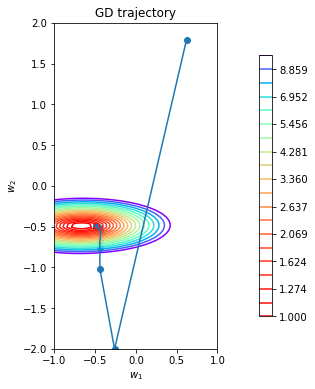

In [345]:
p_list = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
for p in p_list:
    wlist = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, p, num_steps)
    print(f'p = {p}')
    plot_gd(wlist, X, y, loss)

Чем меньше значение параметра p, тем быстрее градиентный спуск сходится к точке минимума (наиболее удачным вариантом из представленных выше мне кажется p = 0.3 или 0.5). По мере движения при увеличении параметра p длина шага убывает всё быстрее, из-за чего при больших p стохастический градиентный спуск не доходит до минимума, останавливаясь раньшею

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

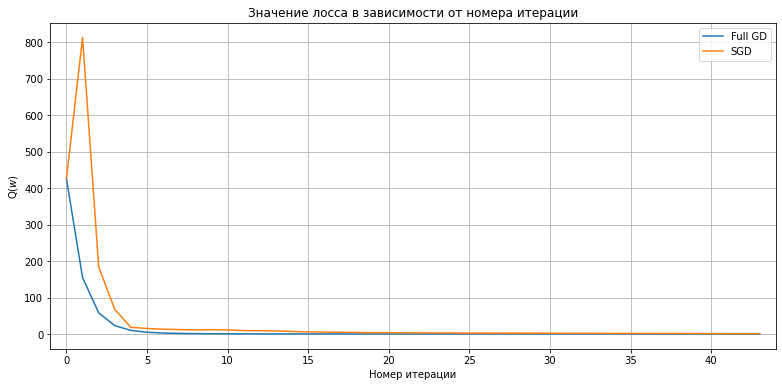

In [346]:
np.random.seed(123)

loss = MSELoss()
lr = 0.01
p = 0.5
batch_size = 10

gd_w_list = gradient_descent(w_init, X, y, loss, lr, num_steps)
residuals_gd = [loss.calc_loss(X, y, w) for w in gd_w_list]

sgd_w_list = stochastic_gradient_descent(w_init, X, y, loss, lr, batch_size, p, num_steps)
residuals_sgd = [loss.calc_loss(X, y, w) for w in sgd_w_list]

plt.figure(figsize=(13, 6))
plt.plot(range(num_steps + 1), residuals_gd, label='Full GD')
plt.plot(range(num_steps + 1), residuals_sgd, label='SGD')

plt.title('Значение лосса в зависимости от номера итерации')
plt.xlim((-1, num_steps + 1))
plt.legend()
plt.xlabel('Номер итерации')
plt.ylabel(r'Q($w$)')
plt.ticklabel_format(style='plain', axis='y')


plt.grid()
plt.show()

На графике видно преимущество стохастического градиентного спуска: ему требуется незначительно больше итераций, чтобы попасть в минимум, а каждая итерация занимает гораздо меньше времени за счет маленького размера подвыборки.

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [300]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.random.uniform(-2, 2, (X.shape[1]))        
        w_grad = gradient_descent(w_init, X, y, self.loss, self.lr)
        self.w = w_grad[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)
        

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [301]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [276]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [277]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [278]:
X_raw = pd.get_dummies(X_raw, drop_first=True)
X_raw.head()

,index,0,1,9,10,11,12,13,16,18,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
0,0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,...,0,0,0,0,0,0,0,1,0,0
3,3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [279]:
X_raw.isnull().values.any()

True

In [280]:
from sklearn.model_selection import train_test_split

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, \
                                                    test_size=0.3,\
                                                    shuffle=True,
                                                    random_state=123)

In [282]:
from sklearn.impute import SimpleImputer

In [283]:
mis_replacer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(data=mis_replacer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(data=mis_replacer.fit_transform(X_test), columns=X_test.columns)

In [284]:
from sklearn.preprocessing import MinMaxScaler

In [285]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train = pd.DataFrame(normalizer.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(normalizer.transform(X_test), columns = X_test.columns)

**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [286]:
linear_regression.fit(X_train,y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [287]:
from sklearn.metrics import mean_squared_error

lr_train_mse = mean_squared_error(y_train, linear_regression.predict(X_train))
lr_test_mse = mean_squared_error(y_test, linear_regression.predict(X_test))
print (f"Train: {lr_train_mse}")
print (f"Test: {lr_test_mse}")

Train: 1378081.685783879
Test: 7755399.1906916965


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [288]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        return np.square(X.dot(w) - y).mean() + np.sum(np.square(w[:-1]))* self.coef
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        w[-1] = 0
        return 2 * np.dot(X.T, X.dot(w) - y) / y.shape[0] + np.multiply(w, 2 * self.coef)

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [289]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [290]:
alphas = [0.001, 0.005, 0.01, 0.1, 0.5, 1]

X_train_w_ones = np.hstack([X_train, np.ones([X_train.shape[0], 1])])
X_test_w_ones = np.hstack([X_test, np.ones([X_test.shape[0], 1])])

for alpha in alphas:
    
    loss = MSEL2Loss(alpha)
    lr = LinearRegression(loss)
    lr.fit(X_train,y_train)
    
    lr_train_loss = loss.calc_loss(X_train_w_ones, y_train, lr.w)
    lr_test_loss = loss.calc_loss(X_test_w_ones, y_test, lr.w)

    print(alpha)
    print(f"    Train loss: {lr_train_loss}")
    print(f"    Test  loss: {lr_test_loss}")


0.001
    Train loss: 2697146.6745088976
    Test  loss: 6712234.231141448
0.005
    Train loss: 4788981.050523134
    Test  loss: 8508093.68121792
0.01
    Train loss: 6495947.505305715
    Test  loss: 10077884.901924435
0.1
    Train loss: 20492598.431756534
    Test  loss: 22753754.372824237
0.5
    Train loss: 49599921.35872346
    Test  loss: 43032343.706125006
1
    Train loss: 71475248.70309754
    Test  loss: 55261552.20374569


И на трейне, и на тесте наименьньшая ошибка достигается при коэффициенте 0.001.

In [291]:
lr_w_MSE2 = LinearRegression(MSEL2Loss(0.001))
lr_w_MSE2.fit(X_train,y_train)

lr_w_MSE2_train_mse = mean_squared_error(y_train, lr.predict(X_train))
lr_w_MSE2_test_mse = mean_squared_error(y_test, lr.predict(X_test))

print("Train")
print(f"    MSE:  {lr_train_mse}")
print(f"    MSE2: {lr_w_MSE2_train_mse}")

print("Test")
print(f"    MSE:  {lr_test_mse}")
print(f"    MSE2: {lr_w_MSE2_test_mse}")

Train
    MSE:  1378081.685783879
    MSE2: 33019959.497663055
Test
    MSE:  7755399.1906916965
    MSE2: 16806262.99831123


И на на обучающей, и на тестовой выборке результат лучше у регрессии без регуляризации.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [292]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        z = X.dot(w) - y
        mse = 0.5 * z ** 2
        mae = self.eps * (np.abs(z) - 0.5 * self.eps)
        mask = np.abs(z) < self.eps
        
        return np.mean(np.where(mask, mse, mae))
    
    
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        z = X.dot(w) - y
        first_part = z
        second_part = self.eps * np.sign(z)
        
        mask = np.abs(z) < self.eps
        vect = np.where(mask, first_part, second_part)
        
        return np.dot(X.T, vect) / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [293]:
epsilons = [1, 1.35, 1.7, 2, 3.5, 5]

for eps in epsilons:
    
    loss = HuberLoss(eps)
    lr = LinearRegression(loss)
    lr.fit(X_train, y_train)
    
    lr_train_loss = loss.calc_loss(X_train_w_ones, y_train, lr.w)
    lr_test_loss = loss.calc_loss(X_test_w_ones, y_test, lr.w)

    print(eps)
    print(f"    Train loss: {lr_train_loss}")
    print(f"    Test  loss: {lr_test_loss}")


1
    Train loss: 2848.5536213664395
    Test  loss: 2353.3202496522404
1.35
    Train loss: 3616.0216983664823
    Test  loss: 3157.0989876938806
1.7
    Train loss: 4325.965474291371
    Test  loss: 3855.7350375605884
2
    Train loss: 4909.19774388723
    Test  loss: 4421.914464039762
3.5
    Train loss: 7417.322906947185
    Test  loss: 7215.174470906873
5
    Train loss: 9754.836365388606
    Test  loss: 10376.445618731612


И на трейне, и на тесте наименьньшая ошибка достигается при коэффициенте 1.

In [327]:
lr_huber = LinearRegression(HuberLoss(1.0))
lr_huber.fit(X_train,y_train)
lr_train_huber = mean_squared_error(y_train, lr_huber.predict(X_train))
lr_test_huber = mean_squared_error(y_test, lr_huber.predict(X_test))

print("Train")
print(f"    MSELoss:   {lr_train_mse}")
print(f"    HuberLoss: {lr_train_huber}")
print("Test")
print(f"    MSELoss:   {lr_test_mse}")
print(f"    HuberLoss: {lr_test_huber}")

Train
    MSELoss:   1378081.685783879
    HuberLoss: 26703538.32937688
Test
    MSELoss:   7755399.1906916965
    HuberLoss: 16495371.981845964


У регрессии, обученной с MSELoss, ошибка значительно ниже, чем у регрессии с лоссом HuberLoss.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

очень большой мем вышел

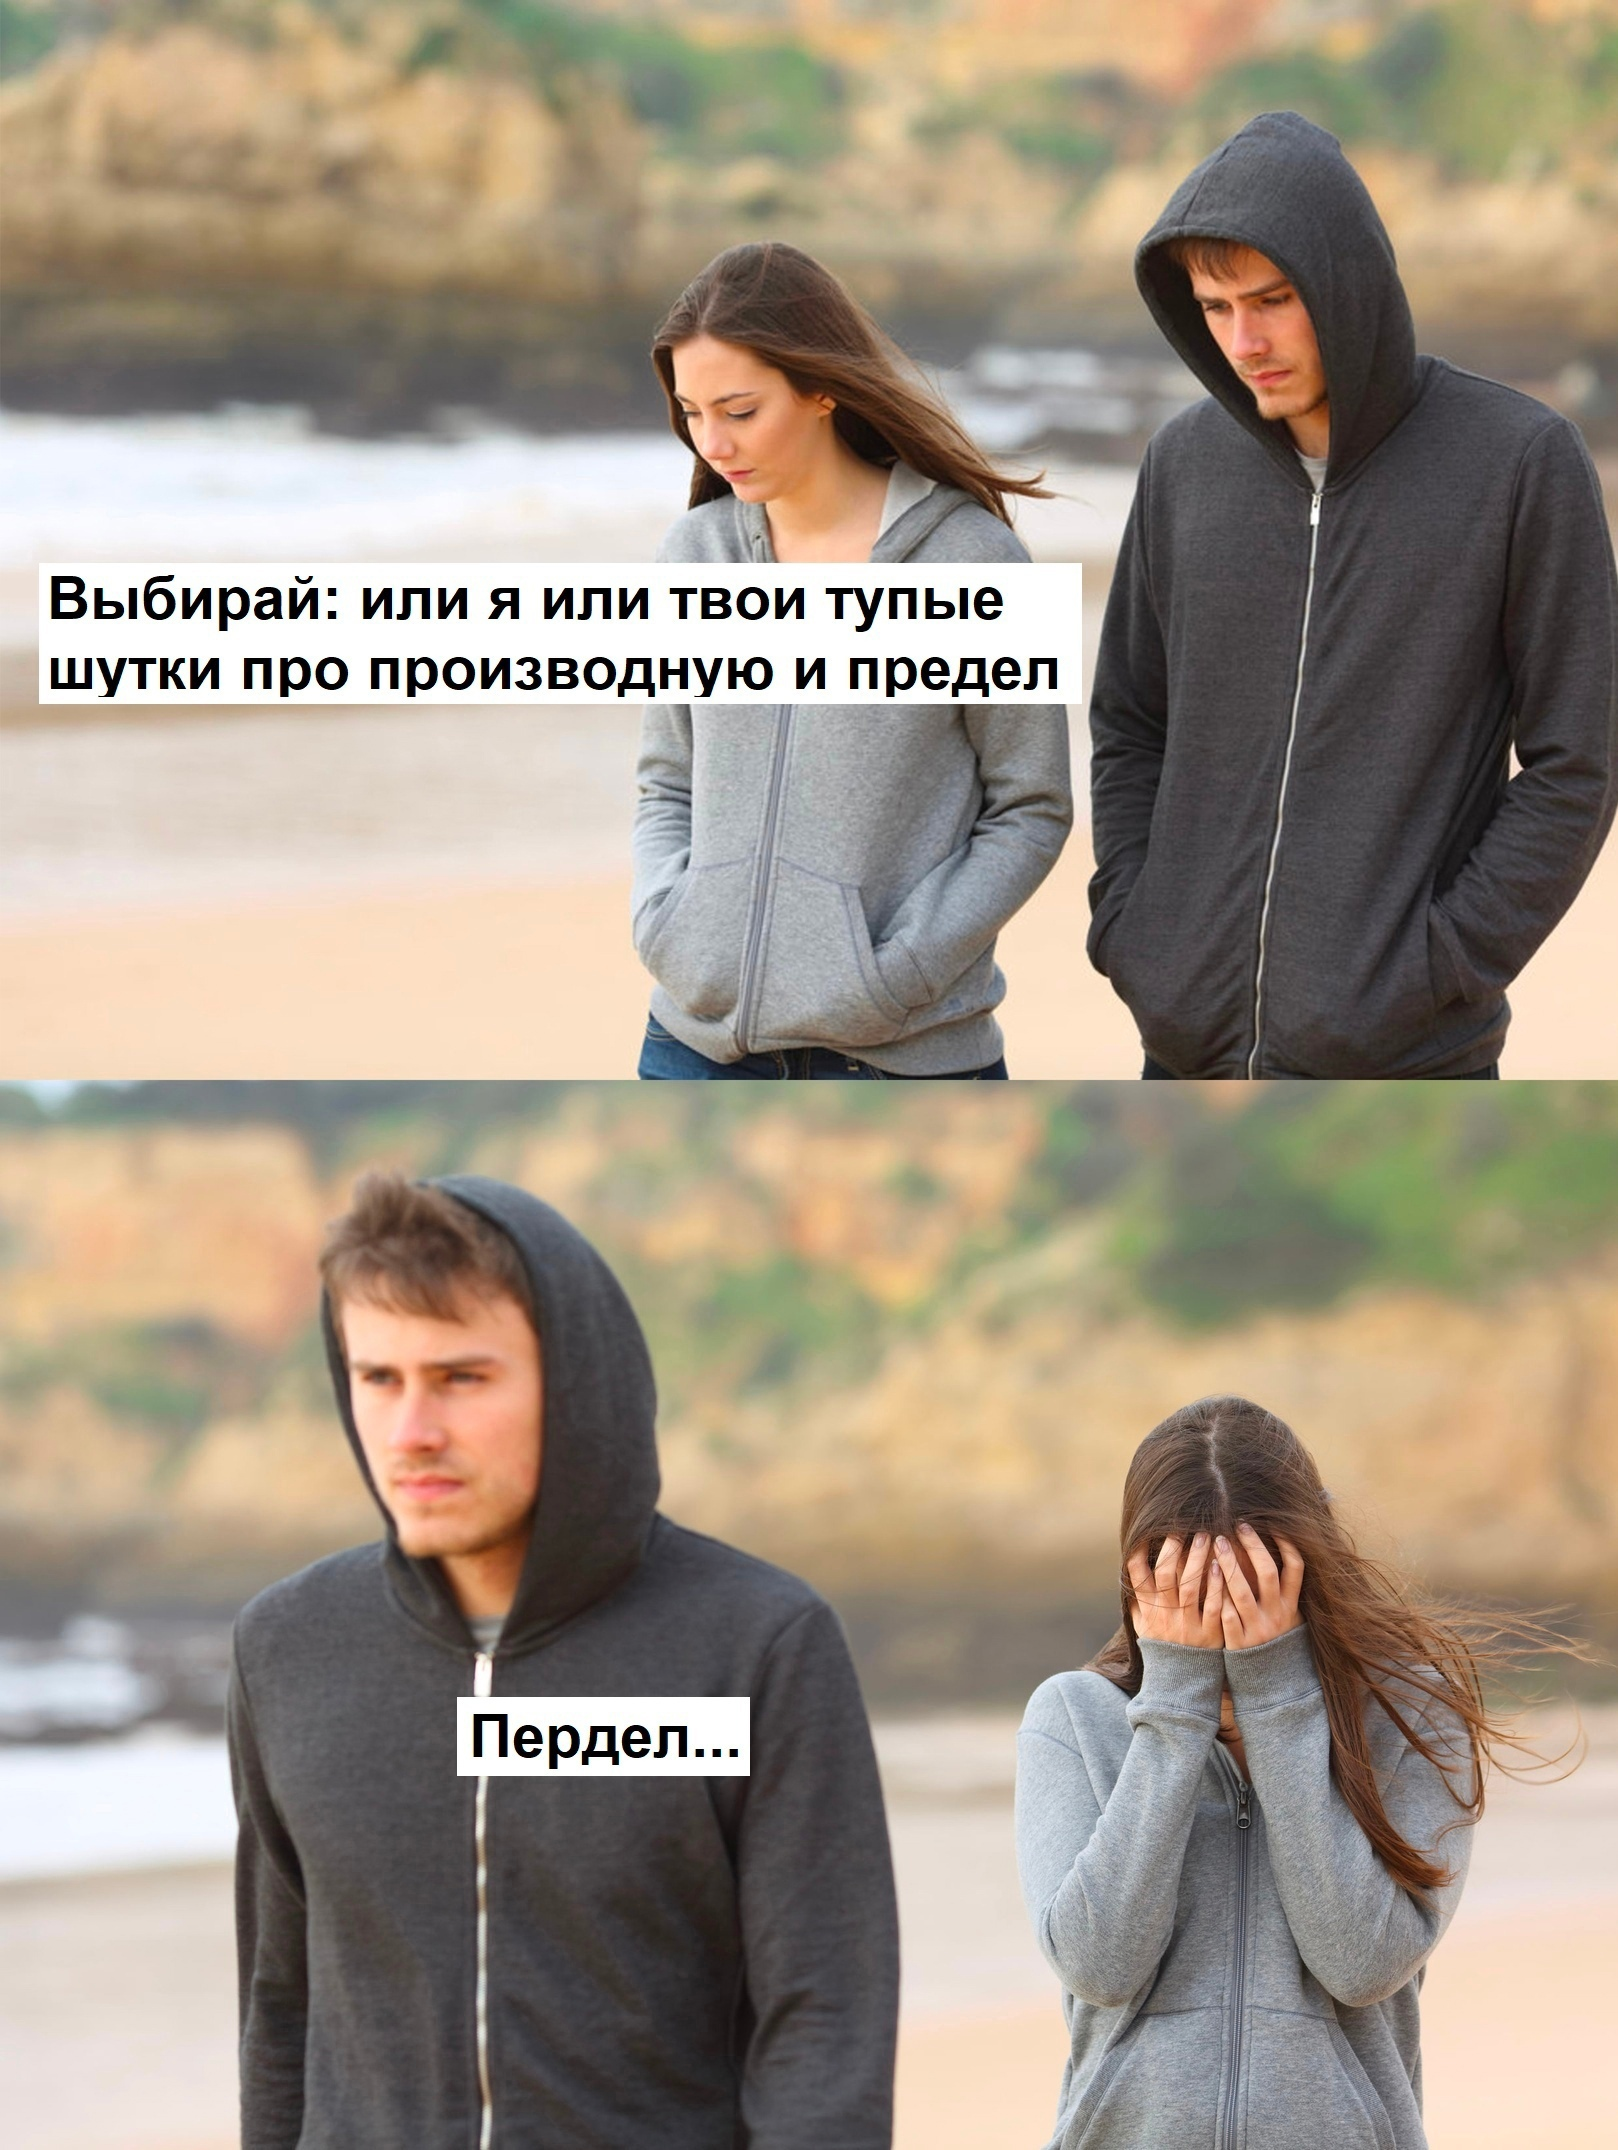

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [295]:
# https://www.machinelearningplus.com/machine-learning/simulated-annealing-algorithm-explained-from-scratch-python/

In [331]:
def simulated_annealing(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
       loss: BaseLoss, temperature: float = 90., n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция, реализующая алгоритм имитации отжига
    :param w_init: np.ndarray размера (n_features,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать целевую функцию (функцию потерь) через loss.calc_loss(X, y, w)
    :param temperature: изначальная температура
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    
    start_point = w_init # create initial point
    start_point_eval = loss.calc_loss(X, y, w_init) # evaluate initial point
    
    # assign previous and new solution to previous and new_point_eval variable 
    alg_start_point, alg_start_eval = start_point, start_point_eval
    
    w_list = [start_point.copy()]
    for i in range(n_iterations):
    
        alg_step = alg_start_point + np.random.standard_t(3, size=alg_start_point.shape)
        alg_step_eval = loss.calc_loss(X, y, alg_step)
        
        if alg_step_eval < start_point_eval:
            start_point, start_point_eval = alg_step, alg_step_eval # append the new values into the output list
            w_list.append(start_point)
        
        difference = alg_step_eval - alg_start_eval
        t = temperature / float(i + 1)
        mac = np.exp(-difference / t) # calculate Metropolis Acceptance Criterion / Acceptance Probability
         
        if difference < 0 or np.random.rand() < mac: # check whether the new point is acceptable
            alg_start_point, alg_start_eval = alg_step, alg_step_eval
            
    return w_list


In [332]:
class LinearRegressionSA:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        
        w_init = np.random.uniform(-2, 2, (X.shape[1]))
        
        w_grad = simulated_annealing(w_init, X, y, self.loss)
        self.w = w_grad[-1]
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.w)
        

In [333]:
np.random.seed(1)

lr_sa = LinearRegressionSA(MSELoss())
lr_sa.fit(X_train, y_train)

print("Train")
print(f"    Gradient descent:    {lr_train_mse}")
print(f"    Simulated annealing: {mean_squared_error(y_train, lr_sa.predict(X_train))}")

print("Test")
print(f"    Gradient descent:    {lr_test_mse}")
print(f"    Simulated annealing: {mean_squared_error(y_test, lr_sa.predict(X_test))}")

Train
    Gradient descent:    1378081.685783879
    Simulated annealing: 225180077.58529583
Test
    Gradient descent:    7755399.1906916965
    Simulated annealing: 127420520.65046605


Похоже, что алгоритм имитации отжига работает значительно хуже, чем градиентный спуск, при одинаковом числе итераций, или просто он криво написан, или просто плохо подобраны гиперпараметры. При увеличении числа итераций на обучающей выборке c 1000 до 100000 алгоритм имитации отжига показывает результат чуть хуже, чем градиентный спуск, но на тестовой лучше.